In [1]:
import re
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import time
import datetime

import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("googleplaystore.csv")

## Data Exploration

Exploring our data

In [3]:
# Print first few rows from data

data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Print last few rows from data

data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
# Shape of data 

data.shape

(10841, 13)

In [6]:
# Basic information of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Looks like there are missing values in "Rating", "Type", "Content Rating", "Current Ver" and " Android Ver".

In [7]:
# Checking null values

data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
# Types of data

data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [9]:
# Describing our data

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [10]:
# Columns present in our data

data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## Data Cleaning

*   Removing null values
*   Filling missing values
*   Remove certain characters from the string and convert it into usable format.






In [11]:
# The best way to fill missing values might be using the median instead of mean

data['Rating'] = data['Rating'].fillna(data['Rating'].median())

In [12]:
#i = data[data["Current Ver"].str.contains(u'\u00AE', na=False)].index
#data.loc[i]

In [13]:
# Lets convert all the versions in the format number.number to simplify the data
# We have to clean all non numerical values & unicode characters 

replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
    data['Current Ver'] = data['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
    data['Current Ver'] = data['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

data['Current Ver'] = data['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
data['Current Ver'] = data['Current Ver'].fillna(data['Current Ver'].median())


In [14]:
# Count the number of unique values in category column 

data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [15]:
# Check the record  of unreasonable value which is 1.9
i = data[data['Category'] == '1.9'].index
data.loc[i]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0,NaN


It's obvious that the first value of this record is missing (App name) and all other values are respectively propagated backward starting from "Category" towards the "Current Ver"; and the last column which is "Android Ver" is left null. It's better to drop the entire recored instead of consider these unreasonable values while cleaning each column!



In [16]:
# Drop this bad column
data = data.drop(i)

In [17]:
# Removing NaN values
data = data[pd.notnull(data['Last Updated'])]
data = data[pd.notnull(data['Content Rating'])]

## Plotting

1.) Count of application according to Category

Text(0.5, 1.0, 'Count of application according to category')

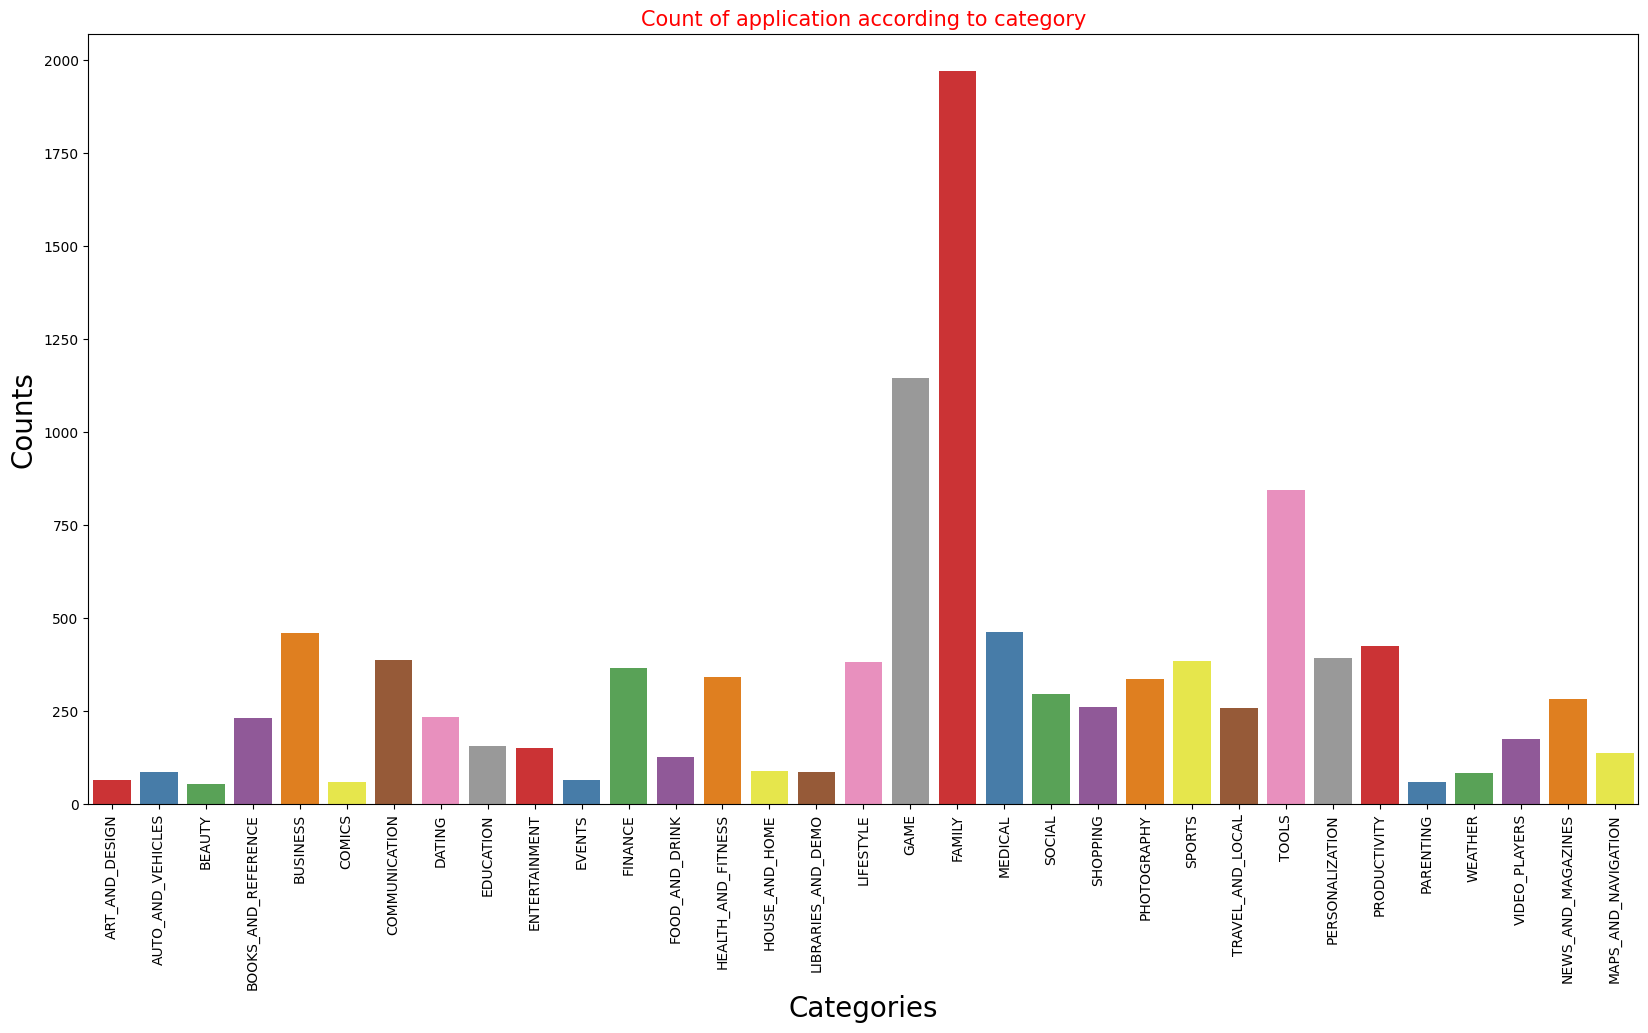

In [18]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Category', data=data, palette='Set1')
plt.xticks(rotation=90)
plt.xlabel('Categories', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.title('Count of application according to category', fontsize=15, color='r')

Seems like family and games category have quite large number 

2.) Let's look at the Rating distribution

Text(0.5, 1.0, 'Distribution of Rating')

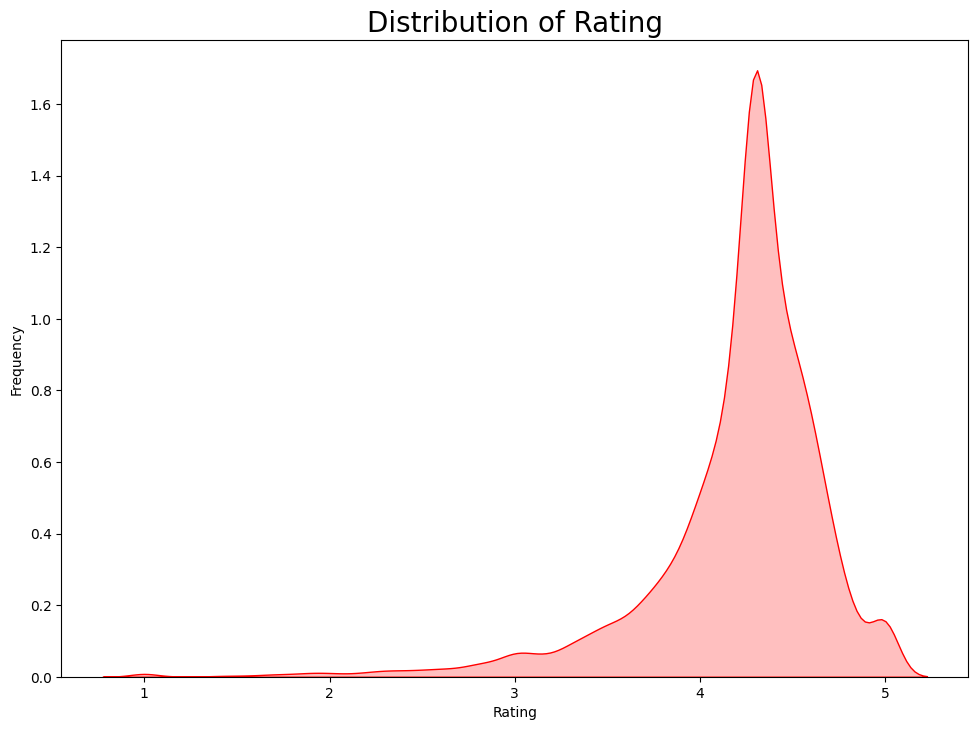

In [19]:
from pylab import rcParams

rcParams['figure.figsize'] = 11.7, 8.27
g = sns.kdeplot(data.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

3.) Let's check out the percentage of free apps in data

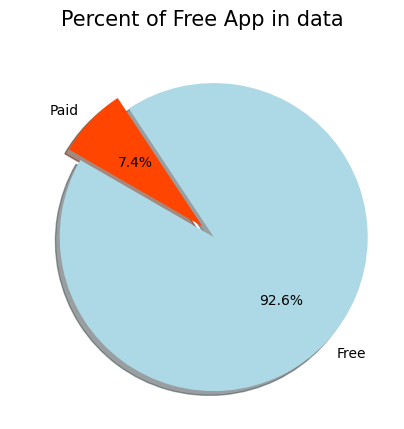

In [20]:
labels =data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)


colors = ["lightblue","orangered"]
explode = (0.1,0)
 
rcParams['figure.figsize'] = 5,5

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150,)

plt.title('Percent of Free App in data', size = 15)
plt.show()

Majority of the apps are free

4.) Category Distribution

*   Wordcloud represents categories with highest number of active apps 



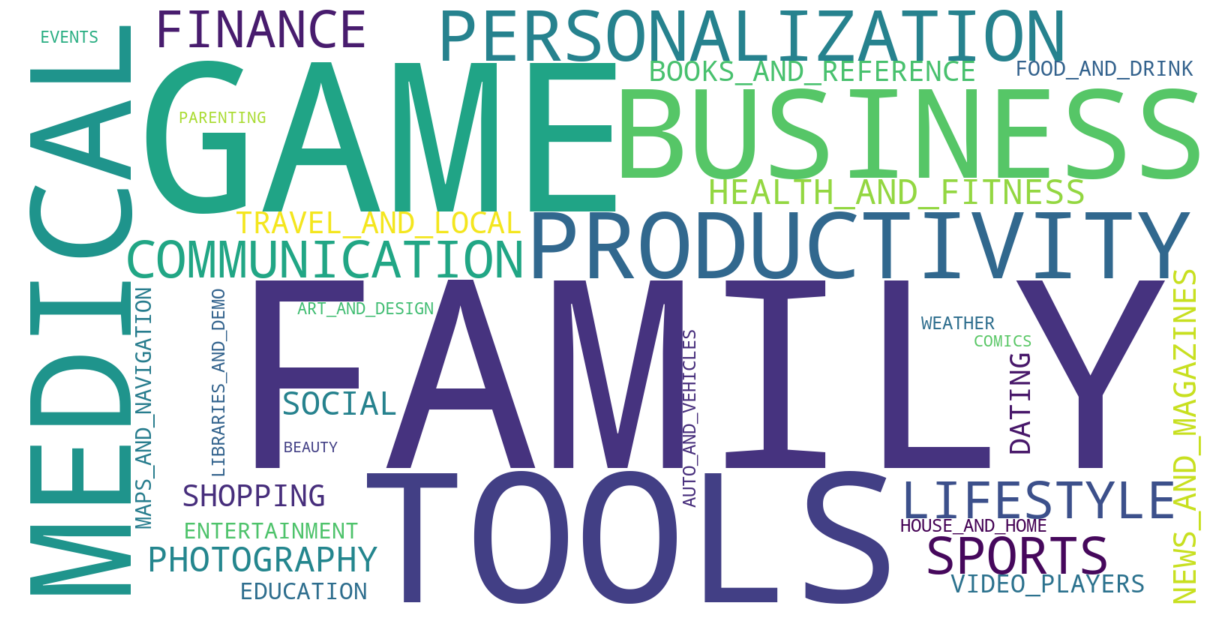

In [21]:
from wordcloud import WordCloud
wordcloud1 = WordCloud(max_font_size=350, collocations=False, max_words=33, width=1600, height=800, background_color="white").generate(' '.join(data['Category']))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

5.) Content Distribution

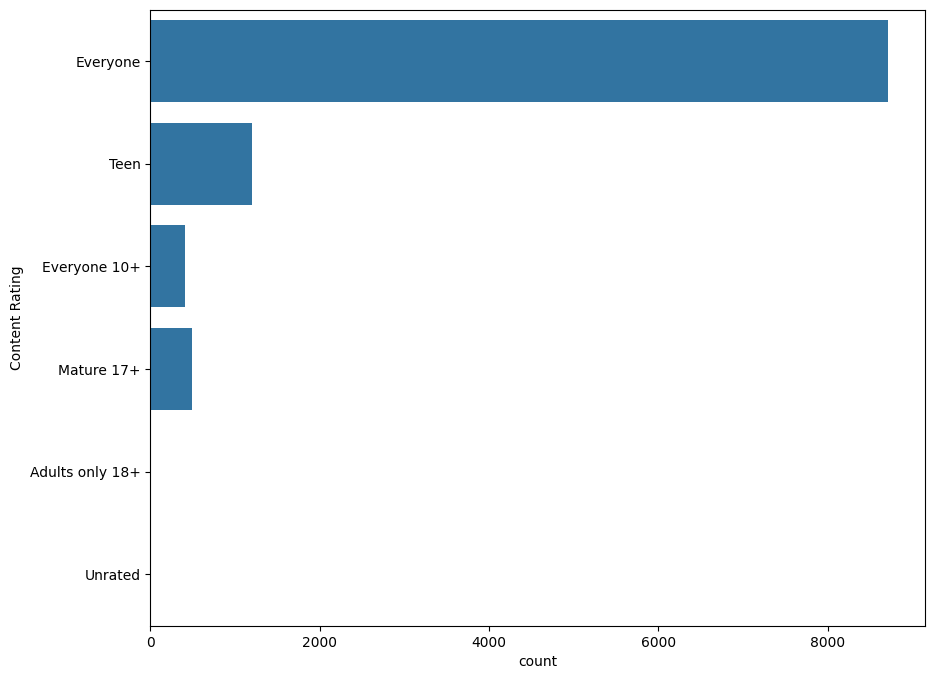

In [22]:
plt.figure(figsize=(10,8))
ax = sns.countplot(y='Content Rating', data=data)

## Categorical Data Encoding

We need to convert categorical features (strings) to numerical features (numbers). 

Many machine learning algorithms can support categorical values without further manipulation but there are many more algorithms that do not. We need to make all data ready for the model, so we will convert categorical variables (variables that stored as text values) into numerical variables. 

In [23]:
# App values encoding

LE = preprocessing.LabelEncoder()
data['App'] = LE.fit_transform(data['App'])

In [24]:
# Genres feature encoding

LE = preprocessing.LabelEncoder()
data['Genres'] = LE.fit_transform(data['Genres'])

In [25]:
# Content Rating feature encoding

LE = preprocessing.LabelEncoder()
data['Content Rating'] = LE.fit_transform(data['Content Rating'])


In [26]:
# Category feature encoding

LE = preprocessing.LabelEncoder()
data['Category'] = LE.fit_transform(data['Category'])

In [27]:
# Type encoding

data = pd.get_dummies(data, columns = ['Type']) 

In [28]:
# Last Updated encoding

data['Last Updated'] = data['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))


In [29]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Type_Free,Type_Paid
0,6962,0,4.1,159,19M,"10,000+",0,1,9,1.515272e+09,1.00,4.0.3 and up,True,False
1,2632,0,3.9,967,14M,"500,000+",0,1,12,1.515964e+09,2.00,4.0.3 and up,True,False
2,8656,0,4.7,87510,8.7M,"5,000,000+",0,1,9,1.533071e+09,1.24,4.0.3 and up,True,False
3,7827,0,4.5,215644,25M,"50,000,000+",0,4,9,1.528405e+09,0.00,4.2 and up,True,False
4,7022,0,4.3,967,2.8M,"100,000+",0,1,11,1.529442e+09,1.10,4.4 and up,True,False


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  int64  
 1   Category        10840 non-null  int64  
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Price           10840 non-null  object 
 7   Content Rating  10840 non-null  int64  
 8   Genres          10840 non-null  int64  
 9   Last Updated    10840 non-null  float64
 10  Current Ver     10840 non-null  float64
 11  Android Ver     10838 non-null  object 
 12  Type_Free       10840 non-null  bool   
 13  Type_Paid       10840 non-null  bool   
dtypes: bool(2), float64(3), int64(4), object(5)
memory usage: 1.1+ MB


In [31]:
# Price cleaning

data['Price'] = data['Price'].apply(lambda x : x.strip('$'))

In [32]:
# Installs cleaning

data['Installs'] = data['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [33]:
# Convert kbytes to Mbytes

k_indices = data['Size'].loc[data['Size'].str.contains('k')].index.tolist()

converter = pd.DataFrame(data.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))

data.loc[k_indices,'Size'] = converter

In [34]:
# Size cleaning

data['Size'] = data['Size'].apply(lambda x: x.strip('M'))
data['Size'] = data['Size'].apply(lambda x: pd.NA if x == 'Varies with device' else x)
temp = data['Size'].dropna().apply(lambda x: float(x))
data['Size'] = data['Size'].fillna(temp.mean())
data['Size'] = data['Size'].astype(float)

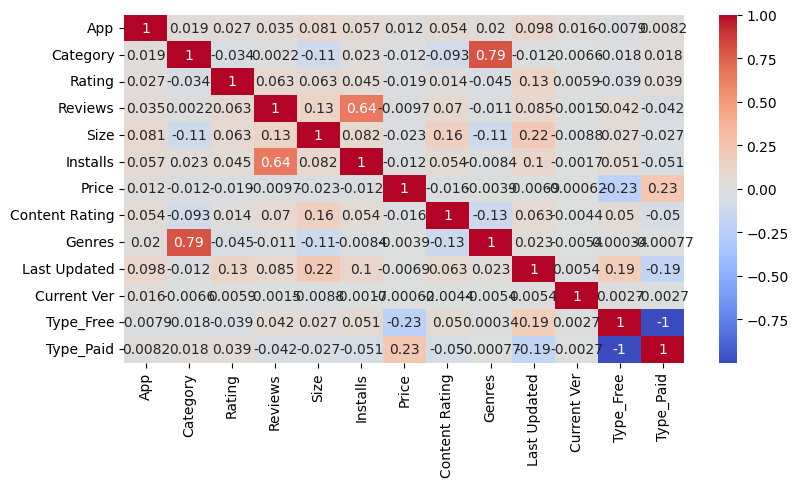

0        19.000000
1        14.000000
2         8.700000
3        25.000000
4         2.800000
           ...    
10836    53.000000
10837     3.600000
10838     9.500000
10839    21.516165
10840    19.000000
Name: Size, Length: 10840, dtype: float64

In [36]:
# Correlation matrix
corr_matrix = data.drop(["Android Ver"], axis=1, inplace=False).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.subplots_adjust(left=0.2, bottom=0.3)
plt.show()
data["Size"]

## Building Machine Learning Model

In [38]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Type_Free', 'Type_Paid'],
      dtype='object')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  int64  
 1   Category        10840 non-null  int64  
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  object 
 6   Price           10840 non-null  object 
 7   Content Rating  10840 non-null  int64  
 8   Genres          10840 non-null  int64  
 9   Last Updated    10840 non-null  float64
 10  Current Ver     10840 non-null  float64
 11  Android Ver     10838 non-null  object 
 12  Type_Free       10840 non-null  bool   
 13  Type_Paid       10840 non-null  bool   
dtypes: bool(2), float64(4), int64(4), object(4)
memory usage: 1.3+ MB


Clamp Transformation for the Outliers

In [40]:
data['Reviews'] = data['Reviews'].astype(float)
data['Installs'] = data['Installs'].astype(float)
data['Price'] = data['Price'].astype(float)

features = ["Category", 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating', 'Genres', 'Type_Free', 'Type_Paid']
y = data['Rating']

data = data[features]
not_list = ['Type_Free', 'Type_Paid']
for i in data.columns.tolist():
    if (data[i].name not in not_list) and (not data[i].name.startswith('cat')):
        
        column = data[i]
        temp = np.array(column)
        
        q1 = np.percentile(temp, 25)
        q3 = np.percentile(temp, 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        print(lower_bound)
        print(upper_bound)

        column = np.where(column < lower_bound, lower_bound, column)
        column = np.where(column > upper_bound, upper_bound, column)

        data[i] = column

X = data[features]

-10.0
46.0
-82068.25
136881.75
-24.25
56.150000000000006
-7497500.0
12498500.0
0.0
0.0
1.0
1.0
-49.0
183.0


#### Feature Derivation

In [42]:
X['Rating'] = y
X['Review_to_Rating_Ratio'] = X['Reviews'] / X['Rating']
X['Size_to_Rating_Ratio'] = X['Size'] / X['Rating']
X['Installs_to_Rating_Ratio'] = X['Installs'] / X['Rating']
X.drop(['Rating'], axis=1, inplace=True)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=10)

#### Gradient Boosting Regressor Model




In [50]:
from skopt import BayesSearchCV, space
from sklearn.ensemble import GradientBoostingRegressor

#### Feature Selection

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    1.8s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    2.9s finished

[2023-12-25 22:21:26] Features: 1/12 -- score: 0.7811348132189002[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    1.2s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    2.7s finished

[2023-12-25 22:21:29] Features: 2/12 -- score: 0.8644685537361271[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.7s finished

[2023-12-25 22:21:31] Features: 3/12 -- score: 0.864619317822874[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of

Best Features: ('Installs', 'Price', 'Content Rating', 'Type_Free', 'Type_Paid', 'Installs_to_Rating_Ratio')



[2023-12-25 22:21:55] Features: 12/12 -- score: 0.8278669208038849

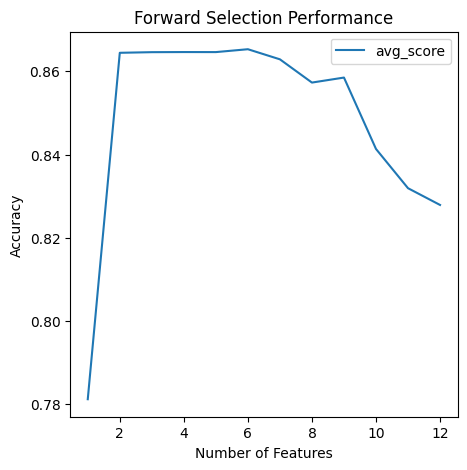

In [51]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

params = {
    'loss': space.Categorical(['squared_error', 'absolute_error', 'huber', 'quantile']),
    'learning_rate': space.Real(0.001, 0.3, prior='log-uniform'),
    'n_estimators': space.Integer(10, 1000, prior='log-uniform'),
    'criterion': space.Categorical(['friedman_mse', 'squared_error']),
    'min_samples_leaf': space.Integer(1, 8, prior='uniform'),
    'max_depth': space.Integer(1, 8, prior='uniform'),
    'max_features': space.Categorical(['sqrt', 'log2']),
}

gbr = GradientBoostingRegressor(random_state = 42)

sfs = SFS(gbr, k_features=X_train.shape[1], forward=True, floating=False, scoring="r2", cv=5, verbose=2, n_jobs=-1)

sfs.fit(X_train, y_train)

sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

best_row = sfs_df[sfs_df["avg_score"] == sfs_df["avg_score"].max()]
best_features = best_row["feature_names"].values[0]
print("Best Features:", best_features)

sfs_df["avg_score"] = sfs_df["avg_score"].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind="line", y="avg_score", ax=ax)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title("Forward Selection Performance")
plt.show()

X_train = X_train[[*best_features]]
X_test = X_test[[*best_features]]



Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=squared_error, learning_rate=0.08872272543731927, loss=quantile, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=24;, score=-0.404 total time=   0.2s
[CV 5/5] END criterion=squared_error, learning_rate=0.08872272543731927, loss=quantile, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=24;, score=-0.494 total time=   0.2s
[CV 2/5] END criterion=squared_error, learning_rate=0.08872272543731927, loss=quantile, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=24;, score=-0.522 total time=   0.2s
[CV 4/5] END criterion=squared_error, learning_rate=0.08872272543731927, loss=quantile, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=24;, score=-0.478 total time=   0.2s
[CV 3/5] END criterion=squared_error, learning_rate=0.08872272543731927, loss=quantile, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=24;, score=-0.519 total time

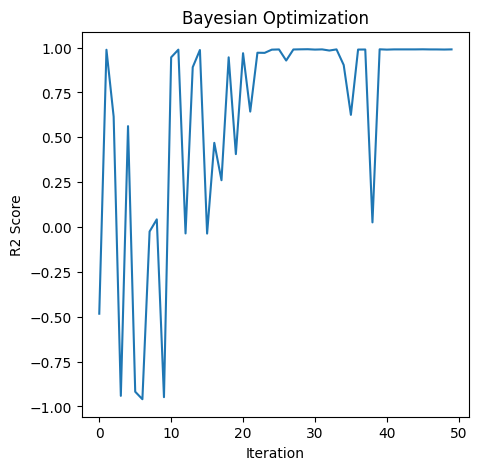

In [52]:
search = BayesSearchCV(gbr, params, n_iter = 50, n_jobs=-1, cv = 5, scoring = 'r2',
                       refit = False, verbose = 3)

search.fit(X_train, y_train)

search_df = pd.DataFrame(search.cv_results_)
plot = sns.lineplot(x = search_df.index, y = search_df['mean_test_score'])
plot.set(xlabel = 'Iteration', ylabel = 'R2 Score', title = 'Bayesian Optimization')
plt.show()

In [53]:
highest_score = search_df['mean_test_score'].max()
highest_score

0.9910841548088516

In [54]:
gbr.set_params(**search.best_params_)
gbr.fit(X_train[[*best_features]], y_train)
y_pred = gbr.predict(X_test)
print("Train Score:", gbr.score(X_train, y_train))
print("Test Score:", gbr.score(X_test, y_test))

Train Score: 0.9999165501862582
Test Score: 0.9556371393581806


In [55]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
val_score = cross_validate(gbr, X_train, y_train, cv=k_fold, n_jobs=-1, scoring='r2', return_train_score=True)

In [56]:
val_score_df = pd.DataFrame(val_score)

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
neg_mse = cross_val_score(gbr, X_train, y_train, cv=k_fold, n_jobs=-1, scoring='neg_mean_squared_error')
neg_rmse = cross_val_score(gbr, X_train, y_train, cv=k_fold, n_jobs=-1, scoring='neg_root_mean_squared_error')
neg_mae = cross_val_score(gbr, X_train, y_train, cv=k_fold, n_jobs=-1, scoring='neg_mean_absolute_error')

In [58]:
pos_mse = -1 * neg_mse
pos_rmse = -1 * neg_rmse
pos_mae = -1 * neg_mae

In [59]:
print("Mean Squared Error:", pos_mse.mean())
print("Root Mean Squared Error:", pos_rmse.mean())
print("Mean Absolute Error:", pos_mae.mean())

Mean Squared Error: 0.0021528635071887577
Root Mean Squared Error: 0.03801042437938892
Mean Absolute Error: 0.0032731426399812843


Mean test score (r2):  0.9912585844802146


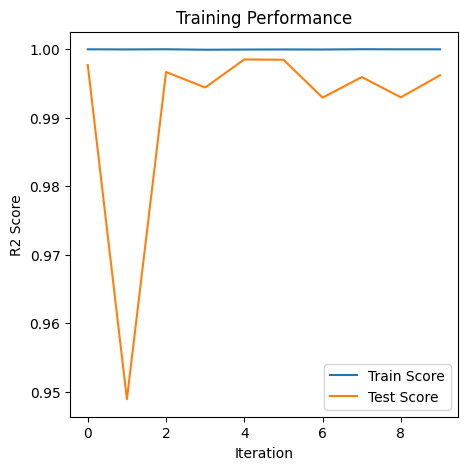

In [60]:
print("Mean test score (r2): ", val_score_df["test_score"].mean()) 
sns.lineplot(x = val_score_df["train_score"].index, y = val_score_df["train_score"], label = "Train Score")
sns.lineplot(x = val_score_df["test_score"].index, y = val_score_df["test_score"], label = "Test Score")
plt.xlabel("Iteration")
plt.ylabel("R2 Score")
plt.title("Training Performance")
plt.legend()
plt.show()

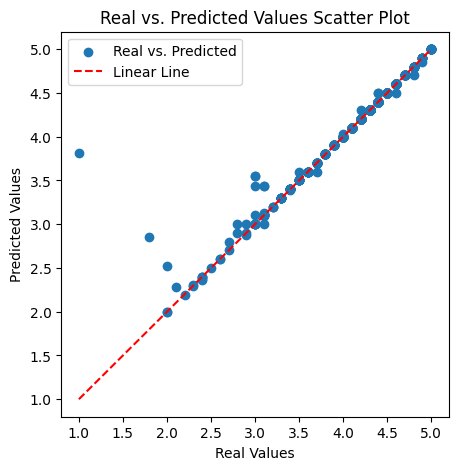

In [61]:
plt.scatter(y_test, y_pred, label="Real vs. Predicted")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color='red', label="Linear Line")

plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Real vs. Predicted Values Scatter Plot")
plt.legend()
plt.show()

In [62]:
print(y_pred[1:20])

[4.39999999 4.5        4.19999989 4.20000002 4.3        4.29999999
 4.00000004 4.39999991 4.20000002 3.29999997 4.29999995 4.3
 4.69999998 4.29999986 4.19999986 4.40000002 4.6        3.99999992
 4.4       ]


In [63]:
print(y_test[1:20])

6547     4.4
2378     4.5
5744     4.2
3793     4.2
10736    4.3
6366     4.3
450      4.0
5940     4.4
725      4.2
9344     3.3
8781     4.3
10399    4.3
9814     4.7
4542     4.3
8220     4.2
8694     4.4
2766     4.6
816      4.0
344      4.4
Name: Rating, dtype: float64


In [64]:
np.sort(np.array(y_test)).tofile("y_test.txt", sep="\n")
np.sort(np.array(y_pred)).tofile("y_pred.txt", sep="\n")